In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 

In [2]:
def plot_classifier(classifier, X, Y):
    # define the ranges to plot the figure
    x_min, x_max = min(X[:,0]) - 1.0, max(X[:,0]) + 1.0
    y_min, y_max = min(X[:,1]) - 1.0, max(X[:,1]) + 1.0
    
    # define the step size that will be used in the mesh grid
    step_size = 0.01
    
    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
                                     np.arange(y_min, y_max, step_size))
    
    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    
    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    
    # plot the output using a colored plot
    plt.figure()
    
    # choose a color scheme
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    
    plt.scatter(X[:,0], X[:,1], c=Y, s=80,
               edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    
    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:,0])-1), int(max(X[:,0])+1), 2)))
    plt.yticks((np.arange(int(min(X[:,1])-1), int(max(X[:,1])), 2)))
    
    plt.show()

In [3]:
input_file = 'data_multivar.txt'
X = []
Y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        Y.append(data[-1])
        
X = np.array(X)
Y = np.array(Y)

In [4]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, Y)
y_pred = classifier_gaussiannb.predict(X)

In [5]:
accuracy = 100.0 * (Y == y_pred).sum() / X.shape[0]
print("Accuracy of the classifier = ", round(accuracy, 2), "%")

Accuracy of the classifier =  99.5 %


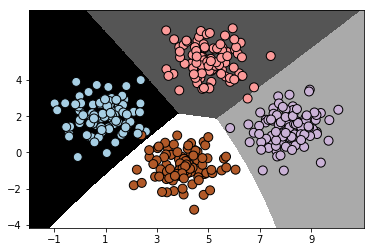

In [6]:
plot_classifier(classifier_gaussiannb, X, Y)

## Splitting the dataset for training and testing

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

In [11]:
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, Y_train)

GaussianNB(priors=None)

In [12]:
y_test_pred = classifier_gaussiannb_new.predict(X_test)

In [13]:
accuracy = 100.0 * (Y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier = ", round(accuracy, 2), '%')

Accuracy of the classifier =  98.0 %


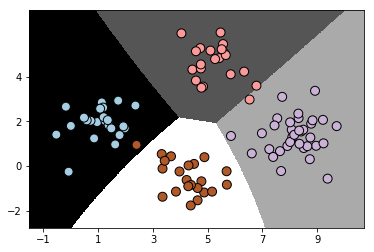

In [14]:
plot_classifier(classifier_gaussiannb_new, X_test, Y_test)

## Evaluating the accuracy using cross validation

In [16]:
from sklearn.model_selection import cross_val_score

num_validations = 5
accuracy = cross_val_score(classifier_gaussiannb, X, Y, scoring='accuracy', cv=num_validations)
print("Accuracy: " + str(round(100 * accuracy.mean(), 2)) + "%")

Accuracy: 99.5%


In [18]:
f1 = cross_val_score(classifier_gaussiannb, X, Y, scoring='f1_weighted', cv=num_validations)
print('F1: ' + str(round(100 * f1.mean(), 2)) + '%')

F1: 99.5%


In [19]:
precision = cross_val_score(classifier_gaussiannb, X, Y, scoring='precision_weighted', cv=num_validations)
print("Precision: " + str(round(100 * precision.mean(), 2)) + "%")

Precision: 99.52%


In [20]:
recall = cross_val_score(classifier_gaussiannb, X, Y, scoring='recall_weighted', cv=num_validations)
print("Recall: " + str(round(100 * recall.mean(), 2)) + "%")

Recall: 99.5%


## Visualizing the confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix